In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import random
random.seed(42)

In [101]:
df = pd.read_csv('/Users/mahinbindra/Desktop/Customer_Data.csv')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [103]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [104]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [105]:
unknown_columns = df.columns[df.eq('unknown').any()]
unknown_columns

Index([], dtype='object')

In [106]:
df[df['CREDIT_LIMIT'].isnull() & df['MINIMUM_PAYMENTS'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [107]:
df2 = df.copy()

In [108]:
minimum_payments_mean = df['MINIMUM_PAYMENTS'].mean()
minimum_payments_mean

864.2065423050828

In [109]:
df2['MINIMUM_PAYMENTS'].fillna(minimum_payments_mean, inplace=True)

In [110]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [111]:
df2['MINIMUM_PAYMENTS'].describe()

count     8950.000000
mean       864.206542
std       2330.588021
min          0.019163
25%        170.857654
50%        335.628312
75%        864.206542
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [112]:
df2[df2['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [113]:
df2.dropna(inplace=True)

In [114]:
df2['CASH_ADVANCE_FREQUENCY'].unique()

array([0.      , 0.25    , 0.083333, 0.166667, 0.333333, 0.363636,
       0.833333, 0.5     , 0.727273, 0.125   , 0.875   , 0.111111,
       0.416667, 0.181818, 0.545455, 0.75    , 0.142857, 0.583333,
       0.666667, 0.222222, 0.285714, 0.909091, 0.2     , 0.625   ,
       0.090909, 0.4     , 1.      , 0.8     , 0.636364, 0.3     ,
       0.916667, 0.444444, 1.25    , 0.1     , 0.428571, 0.272727,
       0.555556, 0.6     , 0.454545, 1.166667, 0.375   , 0.777778,
       0.714286, 0.571429, 0.857143, 1.125   , 1.1     , 1.5     ,
       0.7     , 0.818182, 0.9     , 0.888889, 1.090909, 1.142857])

In [115]:
outlier_df = df2[df2['CASH_ADVANCE_FREQUENCY'] > 1]
outlier_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [116]:
df2.drop(outlier_df.index, inplace=True)

In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8941 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8941 non-null   object 
 1   BALANCE                           8941 non-null   float64
 2   BALANCE_FREQUENCY                 8941 non-null   float64
 3   PURCHASES                         8941 non-null   float64
 4   ONEOFF_PURCHASES                  8941 non-null   float64
 5   INSTALLMENTS_PURCHASES            8941 non-null   float64
 6   CASH_ADVANCE                      8941 non-null   float64
 7   PURCHASES_FREQUENCY               8941 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8941 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8941 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8941 non-null   float64
 11  CASH_ADVANCE_TRX                  8941 non-null   int64  
 12  PURCHASES_T

<Axes: >

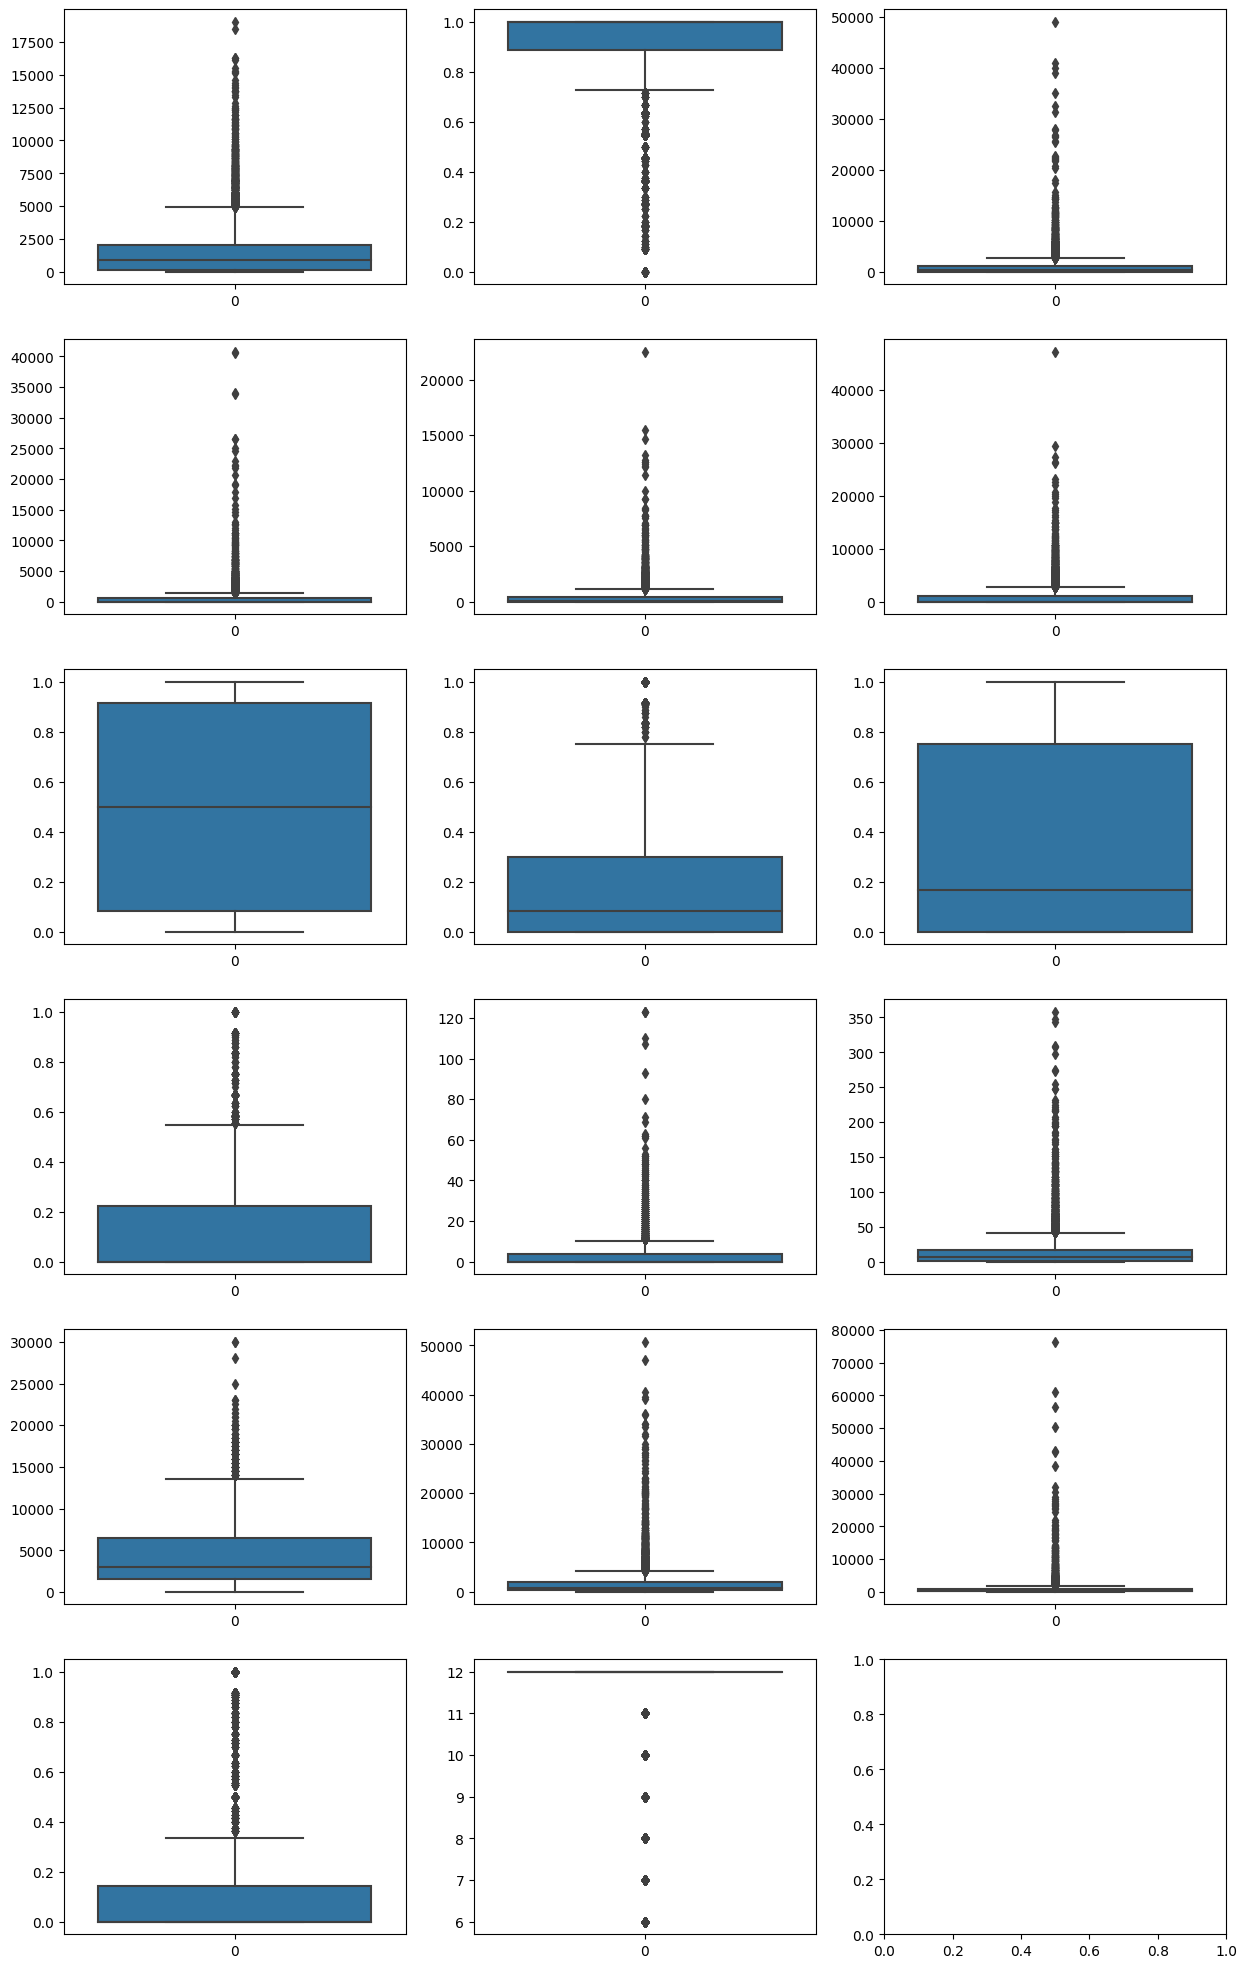

In [118]:
fig, axs = plt.subplots(6,3, figsize=(15,25))
sns.boxplot(df2['BALANCE'], ax=axs[0][0])
sns.boxplot(df2['BALANCE_FREQUENCY'], ax=axs[0][1])
sns.boxplot(df2['PURCHASES'], ax=axs[0][2])
sns.boxplot(df2['ONEOFF_PURCHASES'], ax=axs[1][0])
sns.boxplot(df2['INSTALLMENTS_PURCHASES'], ax=axs[1][1])
sns.boxplot(df2['CASH_ADVANCE'], ax=axs[1][2])
sns.boxplot(df2['PURCHASES_FREQUENCY'], ax=axs[2][0])
sns.boxplot(df2['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[2][1])
sns.boxplot(df2['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][2])
sns.boxplot(df2['CASH_ADVANCE_FREQUENCY'], ax=axs[3][0])
sns.boxplot(df2['CASH_ADVANCE_TRX'], ax=axs[3][1])
sns.boxplot(df2['PURCHASES_TRX'], ax=axs[3][2])
sns.boxplot(df2['CREDIT_LIMIT'], ax=axs[4][0])
sns.boxplot(df2['PAYMENTS'], ax=axs[4][1])
sns.boxplot(df2['MINIMUM_PAYMENTS'], ax=axs[4][2])
sns.boxplot(df2['PRC_FULL_PAYMENT'], ax=axs[5][0])
sns.boxplot(df2['TENURE'], ax=axs[5][1])

<Axes: xlabel='TENURE', ylabel='Count'>

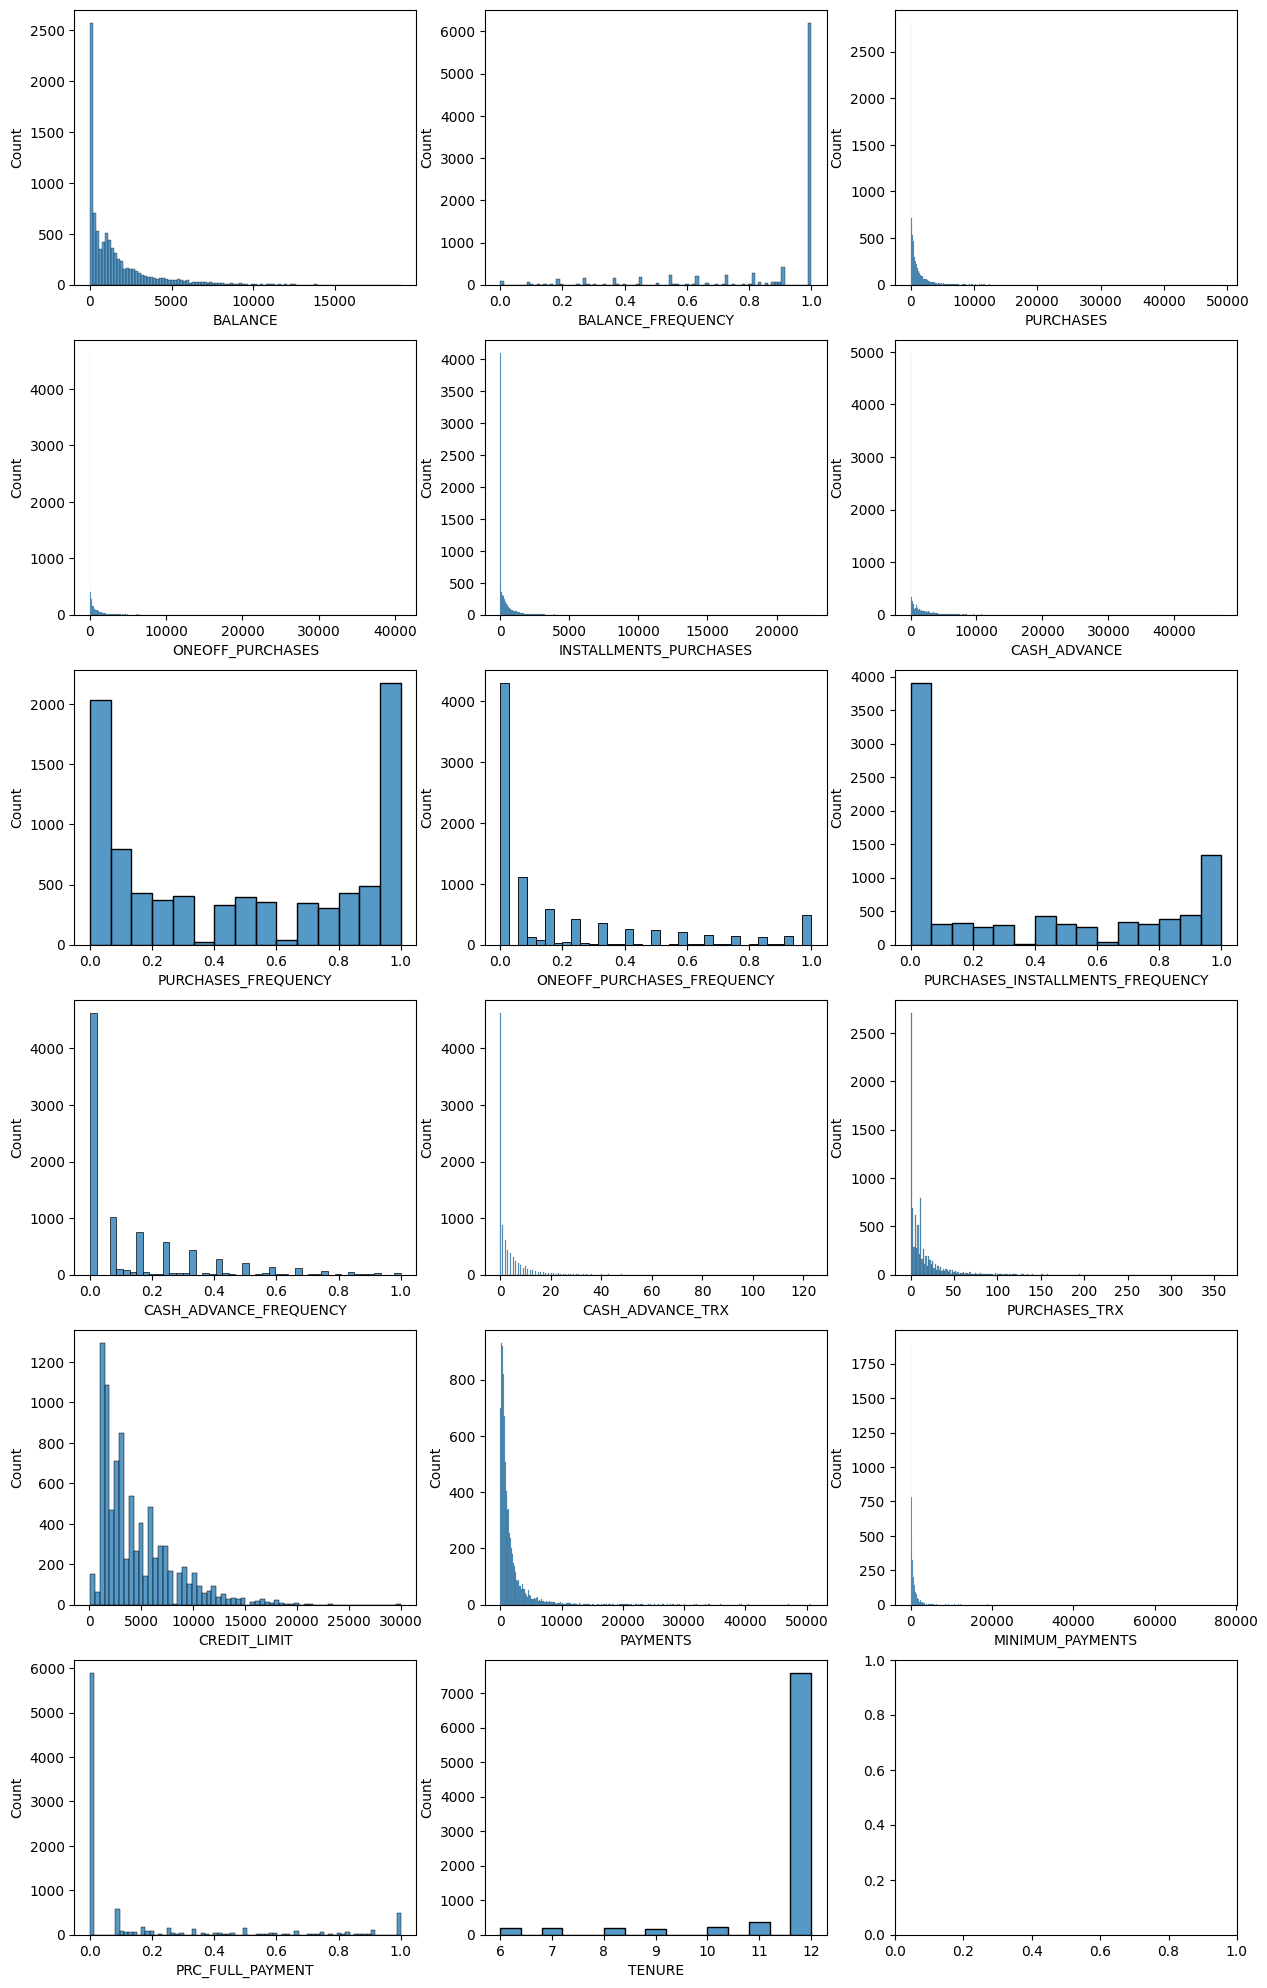

In [119]:
fig, axs = plt.subplots(6,3, figsize=(15,25))
sns.histplot(df2['BALANCE'], ax=axs[0][0])
sns.histplot(df2['BALANCE_FREQUENCY'], ax=axs[0][1])
sns.histplot(df2['PURCHASES'], ax=axs[0][2])
sns.histplot(df2['ONEOFF_PURCHASES'], ax=axs[1][0])
sns.histplot(df2['INSTALLMENTS_PURCHASES'], ax=axs[1][1])
sns.histplot(df2['CASH_ADVANCE'], ax=axs[1][2])
sns.histplot(df2['PURCHASES_FREQUENCY'], ax=axs[2][0])
sns.histplot(df2['ONEOFF_PURCHASES_FREQUENCY'], ax=axs[2][1])
sns.histplot(df2['PURCHASES_INSTALLMENTS_FREQUENCY'], ax=axs[2][2])
sns.histplot(df2['CASH_ADVANCE_FREQUENCY'], ax=axs[3][0])
sns.histplot(df2['CASH_ADVANCE_TRX'], ax=axs[3][1])
sns.histplot(df2['PURCHASES_TRX'], ax=axs[3][2])
sns.histplot(df2['CREDIT_LIMIT'], ax=axs[4][0])
sns.histplot(df2['PAYMENTS'], ax=axs[4][1])
sns.histplot(df2['MINIMUM_PAYMENTS'], ax=axs[4][2])
sns.histplot(df2['PRC_FULL_PAYMENT'], ax=axs[5][0])
sns.histplot(df2['TENURE'], ax=axs[5][1])

In [120]:
numerical_columns = []

In [121]:
for column, dtype in df2.dtypes.items():
    if dtype in [int, float]:
        numerical_columns.append(column)

In [122]:
for column in numerical_columns:
    skewness_values = []
    s = skew(df2[column])
    k = kurtosis(df2[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

BALANCE: skewness = 2.3994040140617696, kurtosis = 7.7149571649848205
BALANCE_FREQUENCY: skewness = -2.022552435827326, kurtosis = 3.0891938687281337
PURCHASES: skewness = 8.139747039591036, kurtosis = 111.23676209787617
ONEOFF_PURCHASES: skewness = 10.038805186574324, kurtosis = 163.94407466084093
INSTALLMENTS_PURCHASES: skewness = 7.295224963920669, kurtosis = 96.44846762794076
CASH_ADVANCE: skewness = 5.178801024877423, kurtosis = 53.076434411124396
PURCHASES_FREQUENCY: skewness = 0.05853597808244953, kurtosis = -1.6386172601916544
ONEOFF_PURCHASES_FREQUENCY: skewness = 1.5346239087091609, kurtosis = 1.1570941854415446
PURCHASES_INSTALLMENTS_FREQUENCY: skewness = 0.5075135972095518, kurtosis = -1.4000102129669876
CASH_ADVANCE_FREQUENCY: skewness = 1.770402483342445, kurtosis = 2.889008131026512
CASH_ADVANCE_TRX: skewness = 5.754283333032101, kurtosis = 62.24952225954442
PURCHASES_TRX: skewness = 4.628085371795896, kurtosis = 34.74651418083208
CREDIT_LIMIT: skewness = 1.5236136445517

In [123]:
if abs(s) > 1:
    df2[column] = df2[column].apply(lambda x: np.log(x + 1))

In [124]:
z_scores = zscore(df2[numerical_columns])
threshold = 4

In [125]:
df2 = df2[(np.abs(z_scores) < threshold).all(axis=1)]

In [126]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8247 entries, 0 to 8912
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8247 non-null   object 
 1   BALANCE                           8247 non-null   float64
 2   BALANCE_FREQUENCY                 8247 non-null   float64
 3   PURCHASES                         8247 non-null   float64
 4   ONEOFF_PURCHASES                  8247 non-null   float64
 5   INSTALLMENTS_PURCHASES            8247 non-null   float64
 6   CASH_ADVANCE                      8247 non-null   float64
 7   PURCHASES_FREQUENCY               8247 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8247 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8247 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8247 non-null   float64
 11  CASH_ADVANCE_TRX                  8247 non-null   int64  
 12  PURCHASES_T

<Axes: xlabel='CREDIT_LIMIT', ylabel='PAYMENTS'>

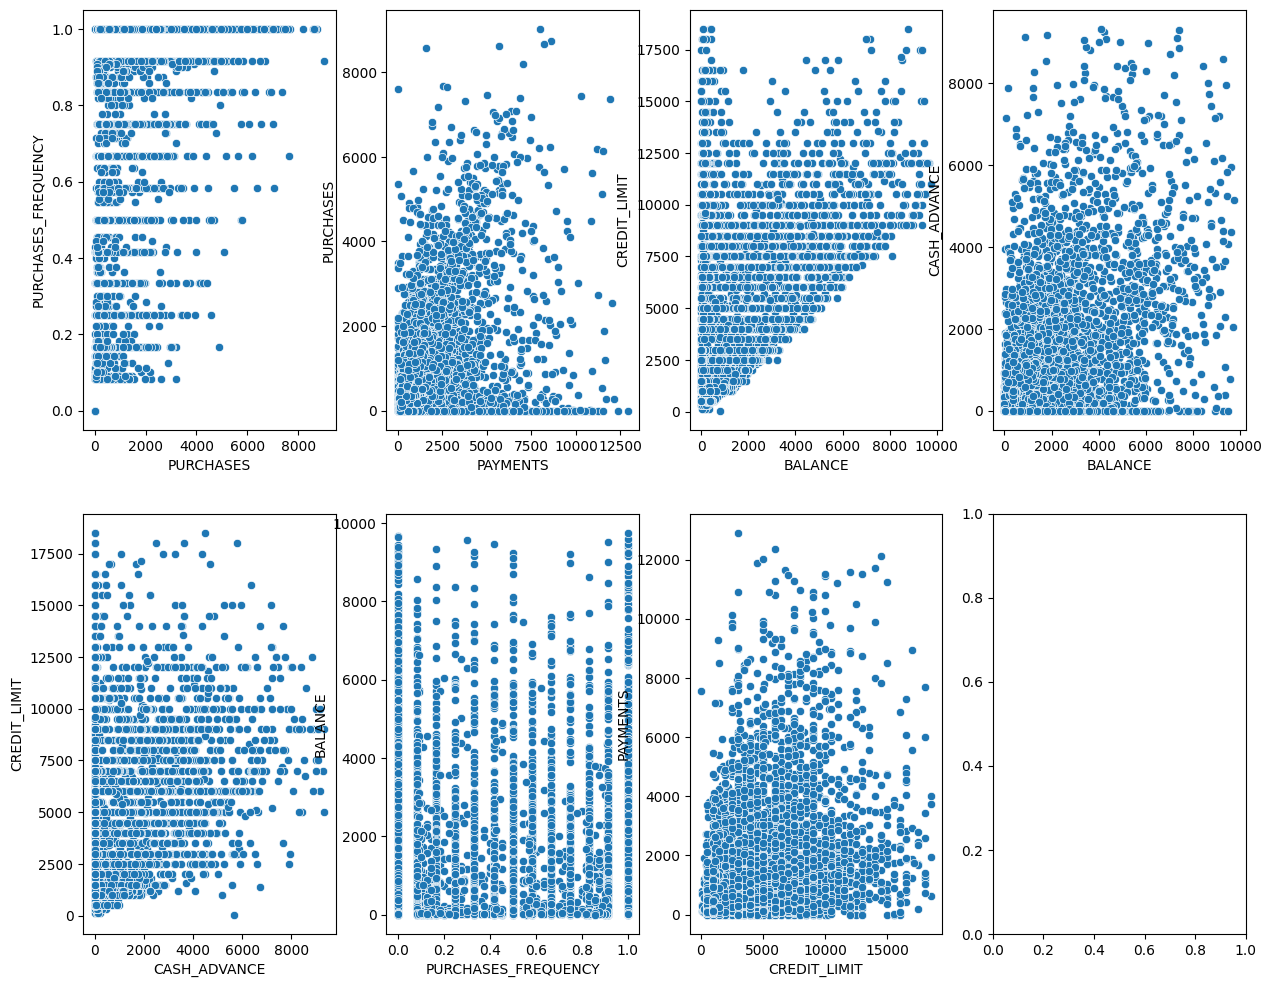

In [127]:
fig, axs = plt.subplots(2,4, figsize=(15,12))
sns.scatterplot(x=df2['PURCHASES'], y=df2['PURCHASES_FREQUENCY'], ax=axs[0][0])
sns.scatterplot(x=df2['PAYMENTS'], y=df2['PURCHASES'], ax=axs[0][1])
sns.scatterplot(x=df2['BALANCE'], y=df2['CREDIT_LIMIT'], ax=axs[0][2])
sns.scatterplot(x=df2['BALANCE'], y=df2['CASH_ADVANCE'], ax=axs[0][3])
sns.scatterplot(x=df2['CASH_ADVANCE'], y=df2['CREDIT_LIMIT'], ax=axs[1][0])
sns.scatterplot(x=df2['PURCHASES_FREQUENCY'], y=df2['BALANCE'], ax=axs[1][1])
sns.scatterplot(x=df2['CREDIT_LIMIT'], y=df2['PAYMENTS'], ax=axs[1][2])

In [128]:
import warnings
warnings.filterwarnings("ignore")

In [129]:
df3 = df2.copy()

In [130]:
df3.drop('CUST_ID', axis = 1, inplace = True)

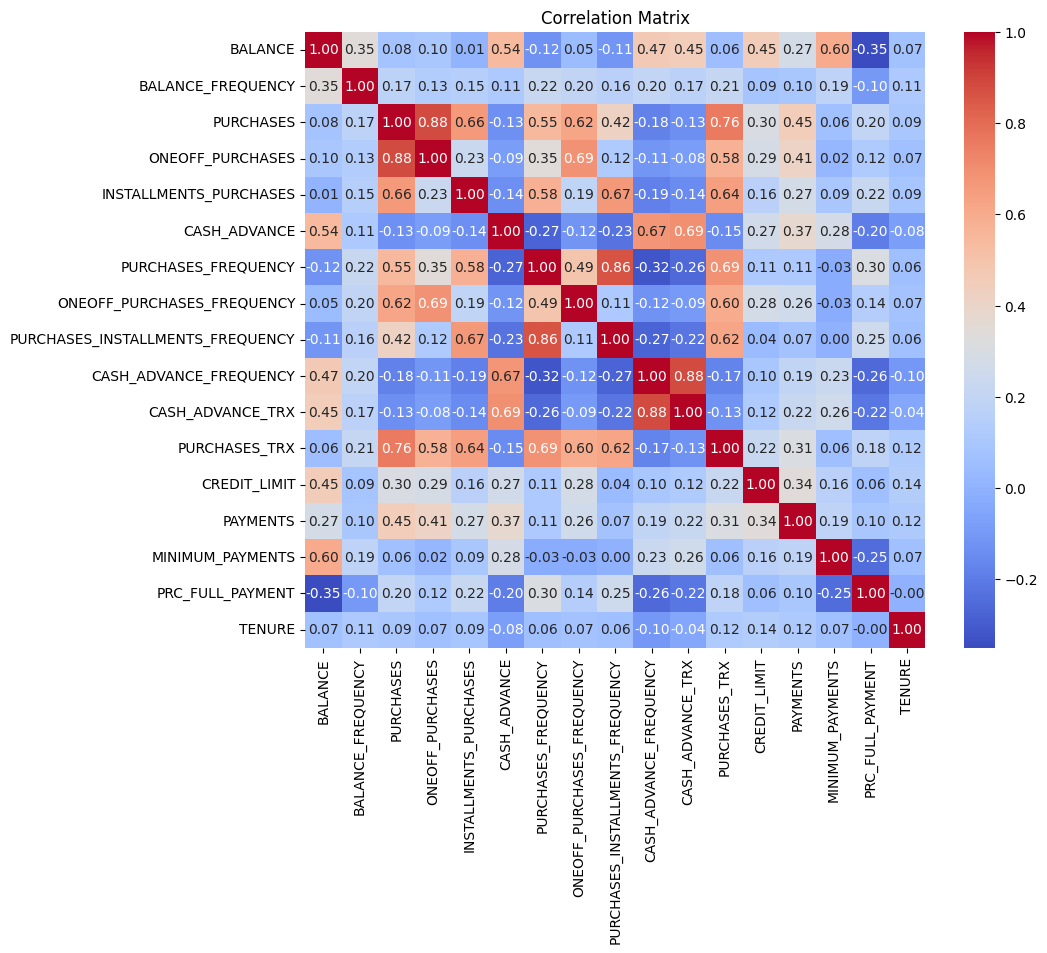

In [131]:
correlation_matrix = df3.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [132]:
selected_columns = ['PURCHASES', 'CREDIT_LIMIT', 'PURCHASES_FREQUENCY', 'BALANCE', 'CASH_ADVANCE', 'PAYMENTS']

In [133]:
df4 = df3[selected_columns]

In [134]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8247 entries, 0 to 8912
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PURCHASES            8247 non-null   float64
 1   CREDIT_LIMIT         8247 non-null   float64
 2   PURCHASES_FREQUENCY  8247 non-null   float64
 3   BALANCE              8247 non-null   float64
 4   CASH_ADVANCE         8247 non-null   float64
 5   PAYMENTS             8247 non-null   float64
dtypes: float64(6)
memory usage: 451.0 KB


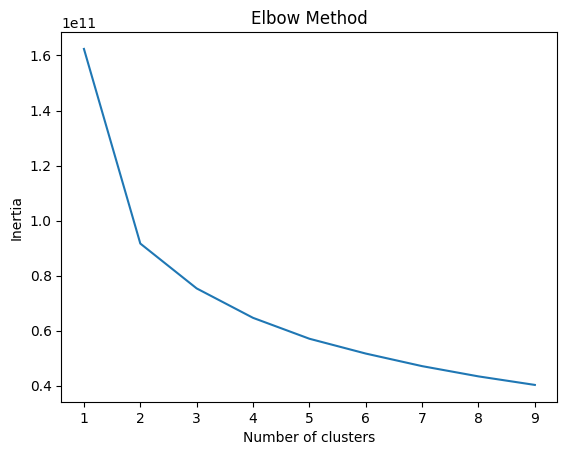

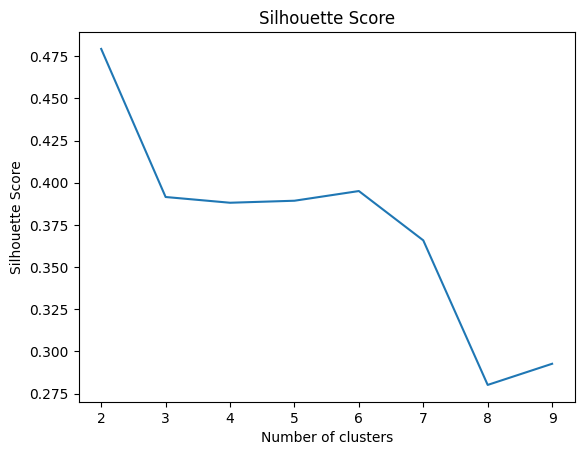

In [135]:
inertia = []
silhouette_avg = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df4)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df4, labels)]

# Silhouette Score

plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 10), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [136]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df4)

In [137]:
df5 = df4.copy()

In [138]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=0)
df5['KMeans_Clusters'] = kmeans.fit_predict(scaled_df)

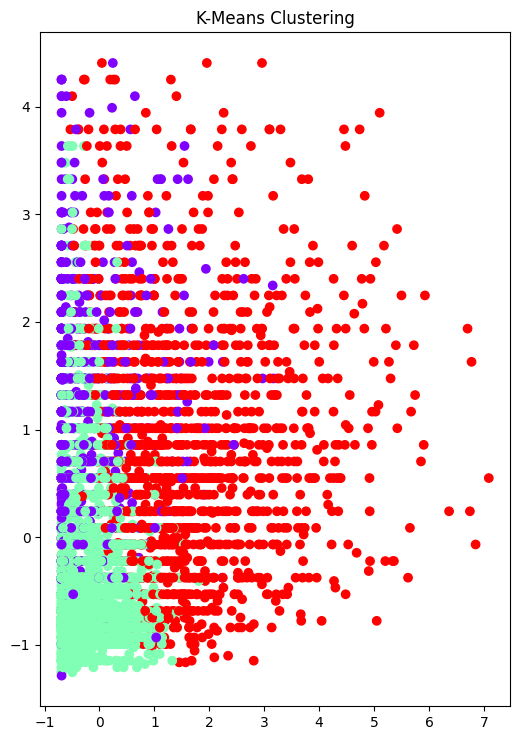

In [139]:
plt.figure(figsize=(15, 7.5))

# K-Means Clustering
plt.subplot(1, 3, 1)
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df5['KMeans_Clusters'], cmap='rainbow')
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

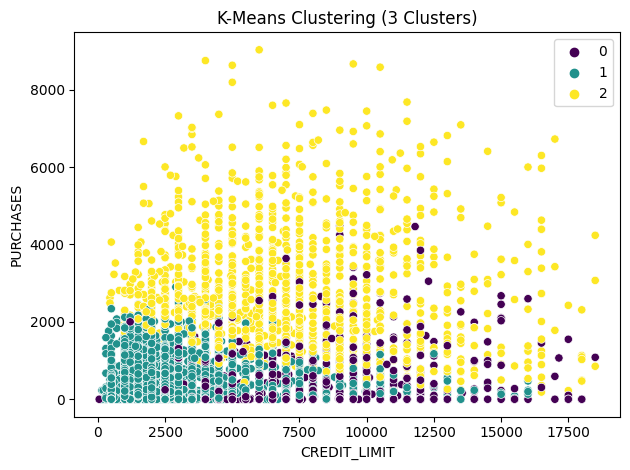

In [140]:
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')

plt.tight_layout()
plt.show()

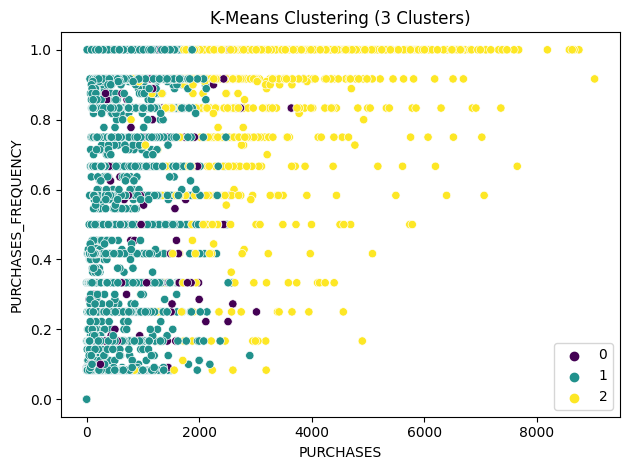

In [141]:
sns.scatterplot(x='PURCHASES', y='PURCHASES_FREQUENCY', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('PURCHASES')
plt.ylabel('PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()

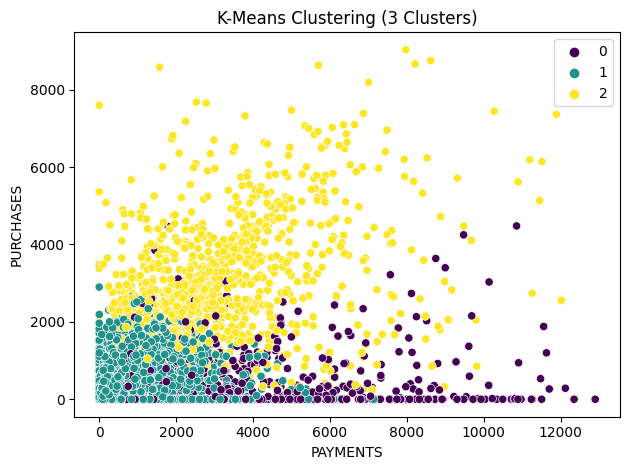

In [142]:
sns.scatterplot(x='PAYMENTS', y='PURCHASES', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('PAYMENTS')
plt.ylabel('PURCHASES')

plt.tight_layout()
plt.show()

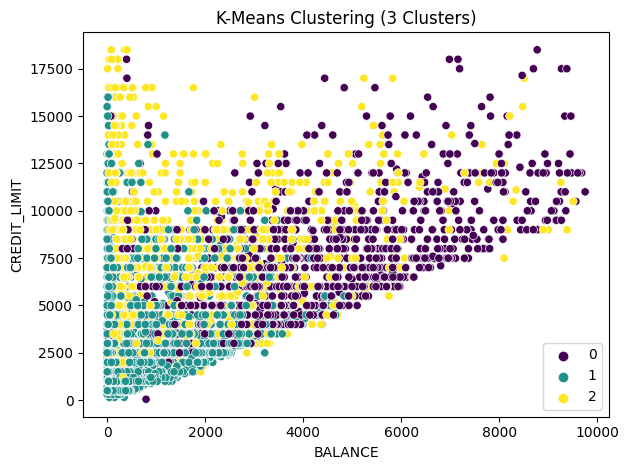

In [143]:
sns.scatterplot(x='BALANCE', y='CREDIT_LIMIT', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

plt.tight_layout()
plt.show()

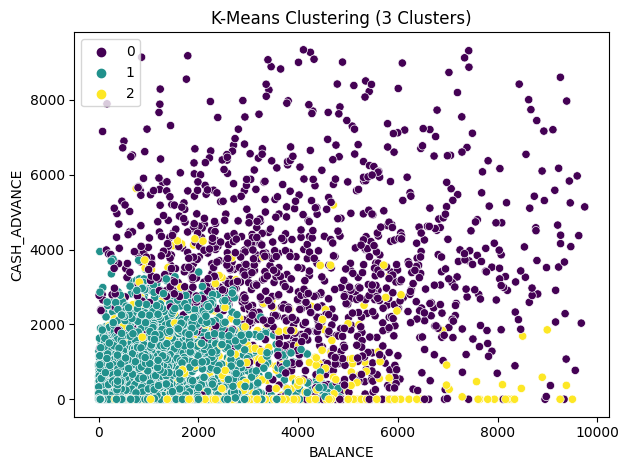

In [144]:
sns.scatterplot(x='BALANCE', y='CASH_ADVANCE', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('BALANCE')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

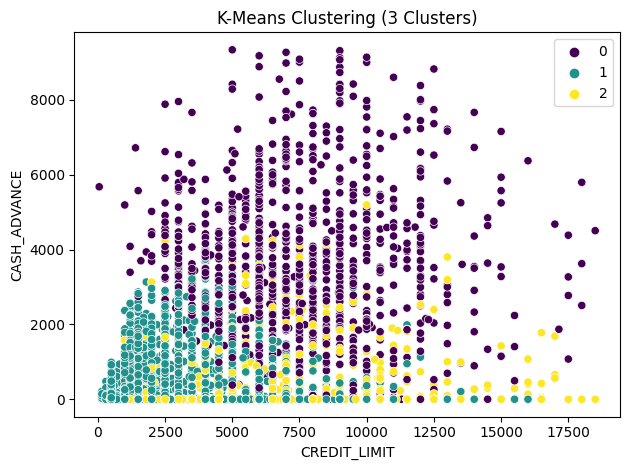

In [145]:
sns.scatterplot(x='CREDIT_LIMIT', y='CASH_ADVANCE', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('CASH_ADVANCE')

plt.tight_layout()
plt.show()

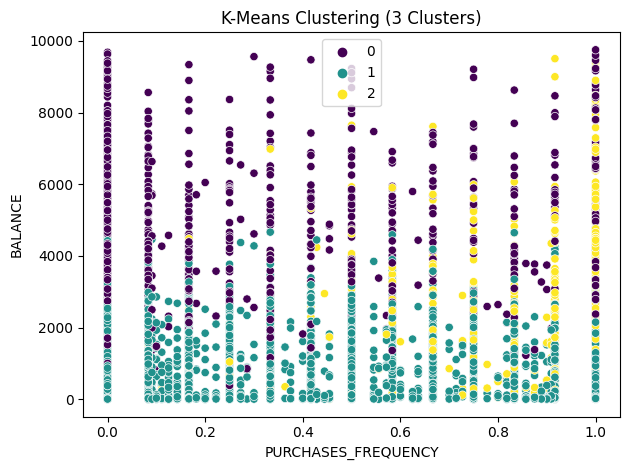

In [146]:
sns.scatterplot(x='PURCHASES_FREQUENCY', y='BALANCE', hue=kmeans.labels_, data=df5, palette='viridis')

plt.title('K-Means Clustering (3 Clusters)')
plt.xlabel('PURCHASES_FREQUENCY')
plt.ylabel('BALANCE')

plt.tight_layout()
plt.show()

In [147]:
df6 = df4.copy()

In [148]:
agg_clustering = AgglomerativeClustering(n_clusters=K)
df6['Hierarchical_Clusters'] = agg_clustering.fit_predict(scaled_df)

In [149]:
linkage_matrix = linkage(scaled_df, method='ward')

In [150]:
plt.figure(figsize=(20, 17))

<Figure size 2000x1700 with 0 Axes>

<Figure size 2000x1700 with 0 Axes>

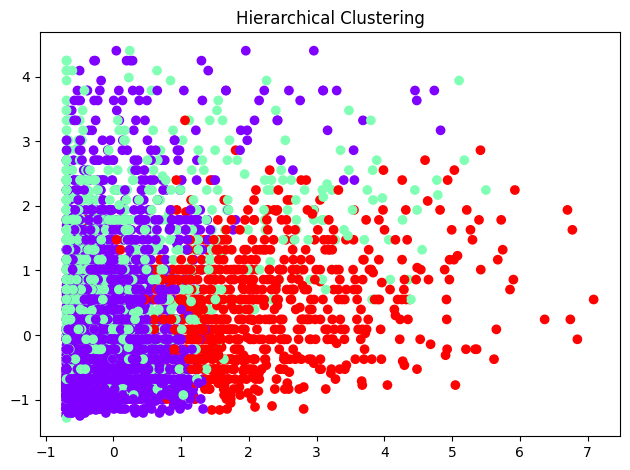

In [151]:
plt.subplot(1, 1, 1)
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df6['Hierarchical_Clusters'], cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.tight_layout()
plt.show()

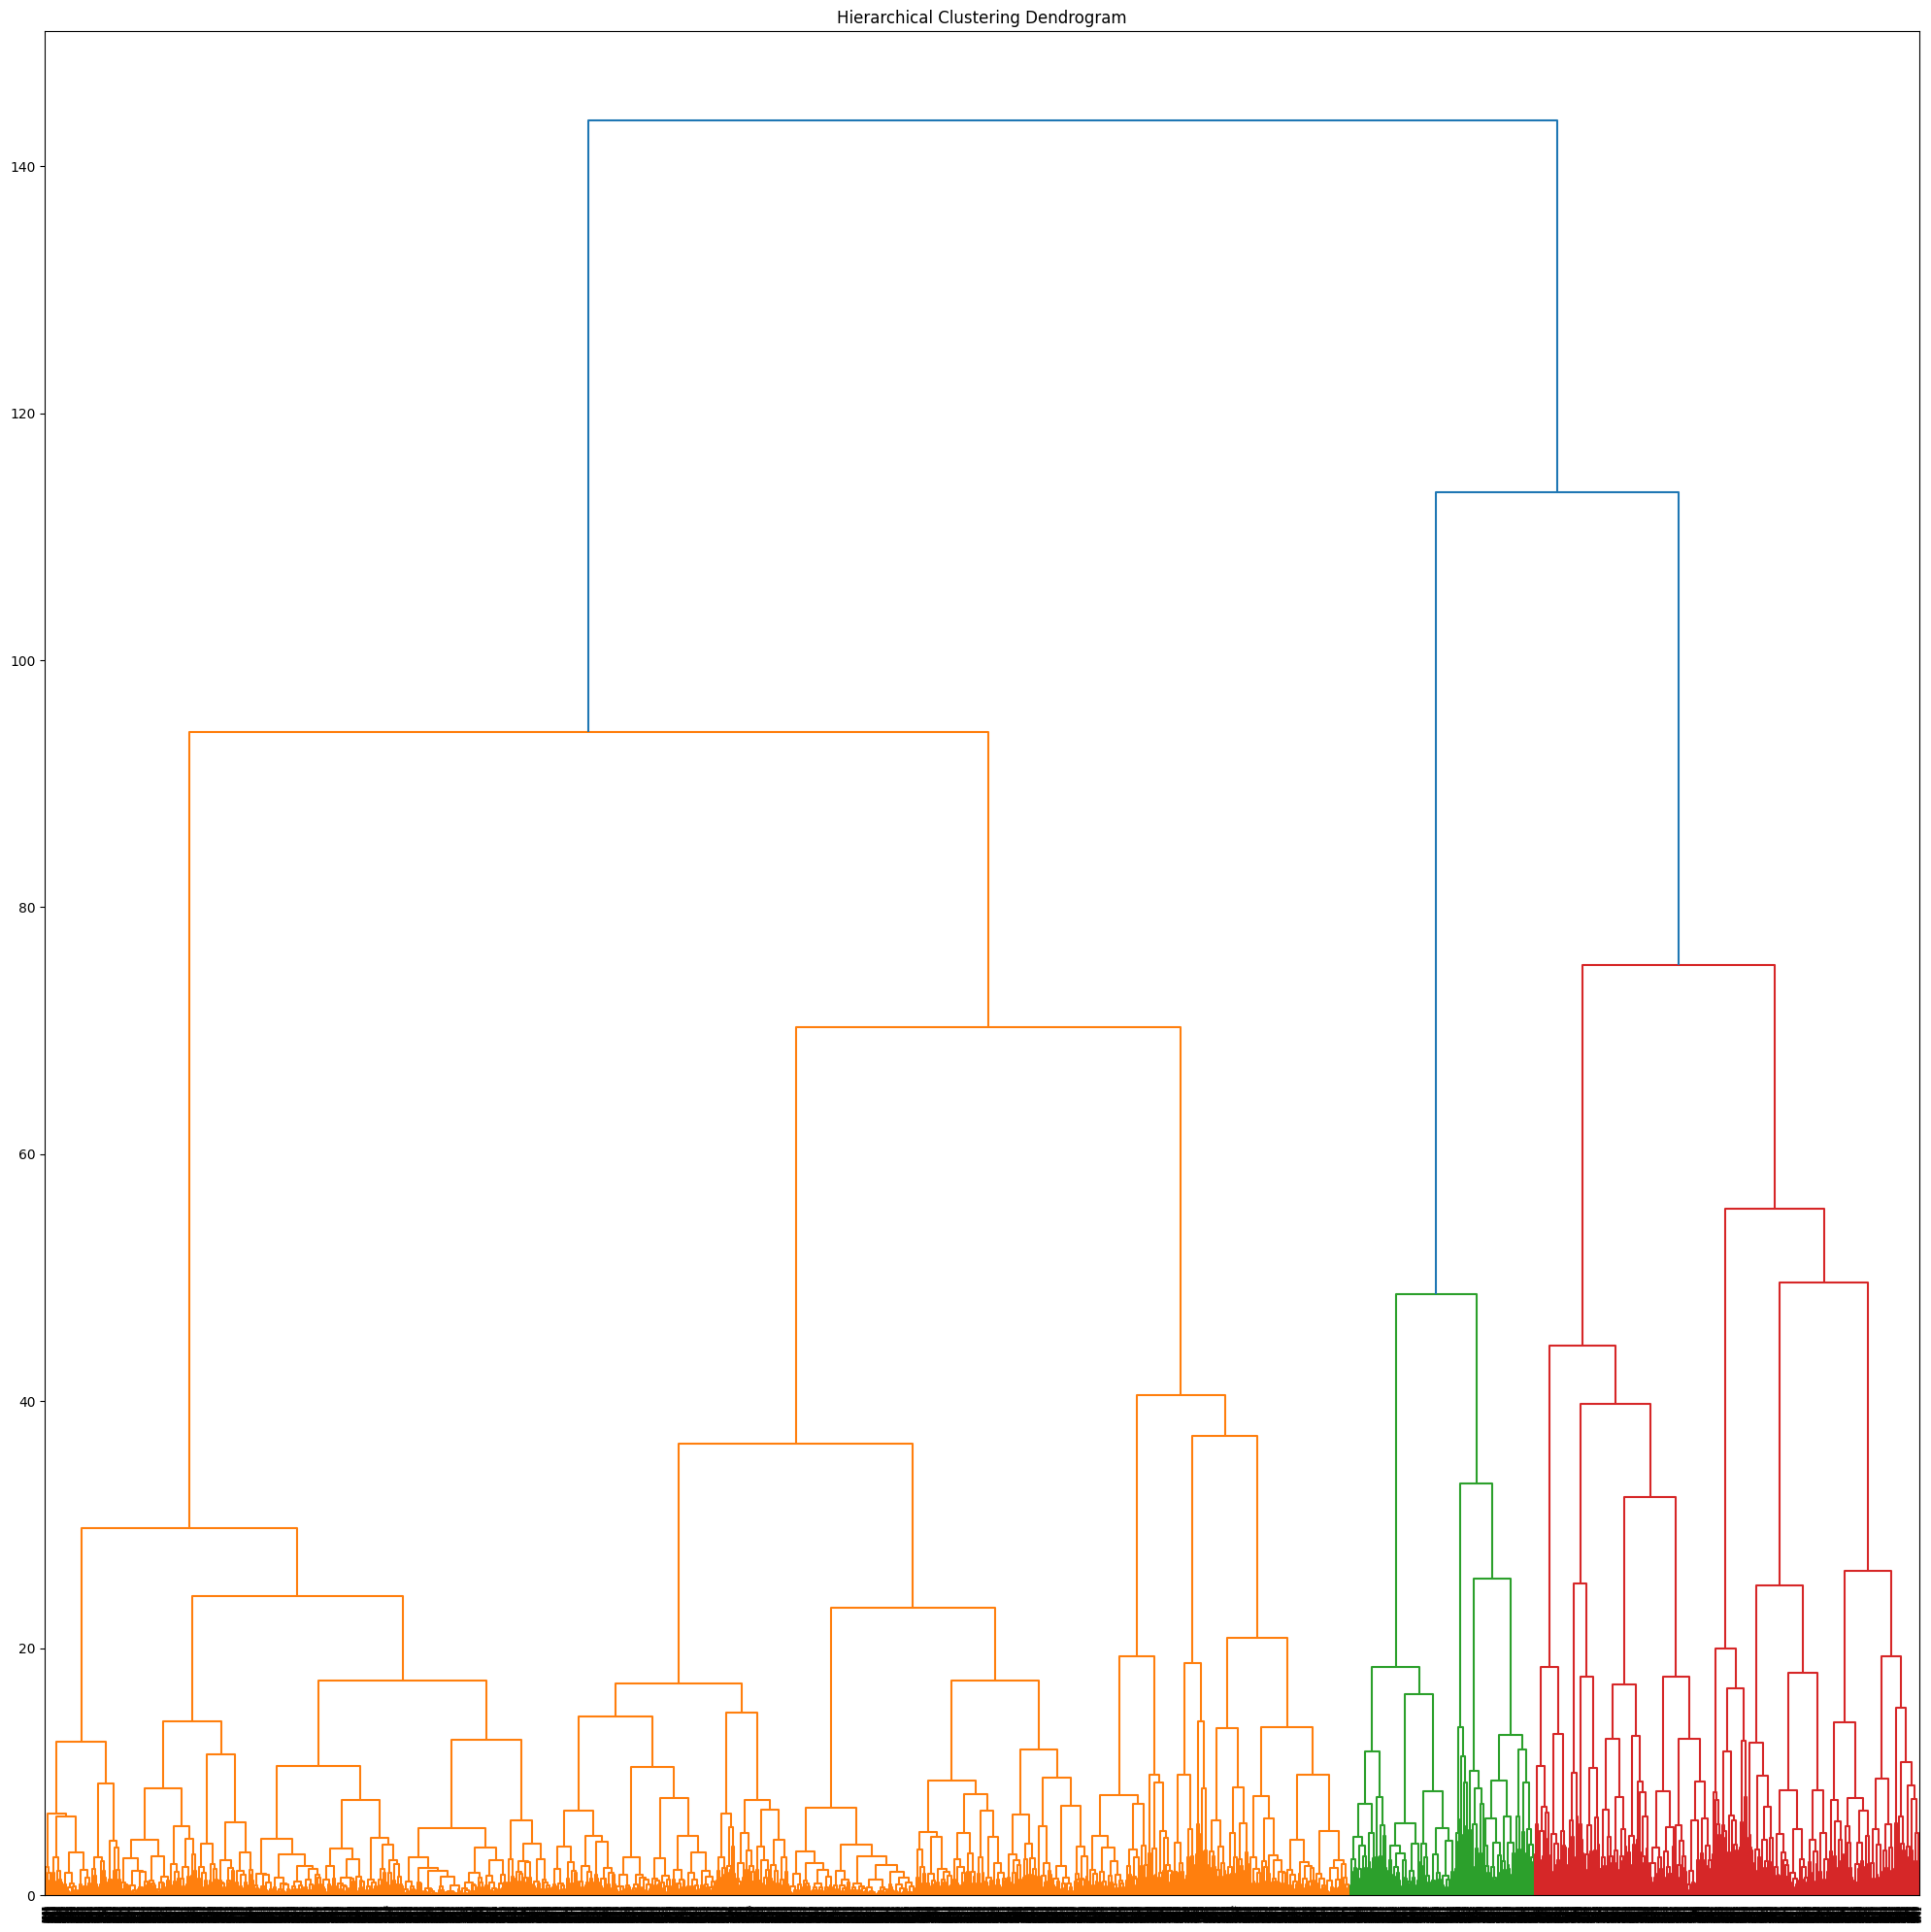

In [152]:
# Dendrogram
plt.figure(figsize=(20, 20))

plt.subplot(1, 1, 1)
dendrogram(linkage_matrix, orientation='top', labels=df6.index)
plt.title('Hierarchical Clustering Dendrogram')

plt.tight_layout()
plt.show()

In [153]:
df7 = df4.copy()

DBSCAN Silhouette Score: 0.3133292649177806


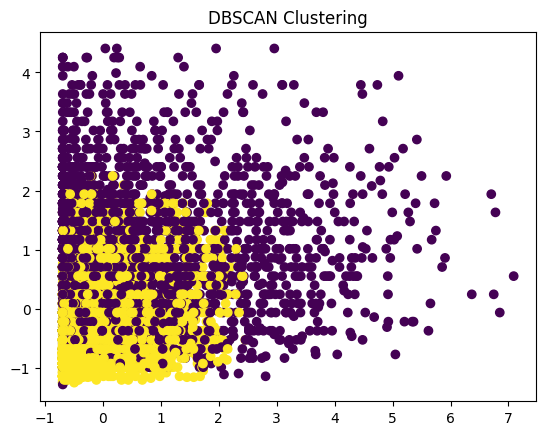

In [174]:
dbscan = DBSCAN(eps=0.6, min_samples=30)
dbscan_labels = dbscan.fit_predict(scaled_df)

# Silhouette Score
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(scaled_df, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

In [175]:
dbscan = DBSCAN(eps=0.6, min_samples=30)
df7['DBSCAN_Clusters'] = dbscan.fit_predict(scaled_df)

DBSCAN Silhouette Score: 0.3133292649177806


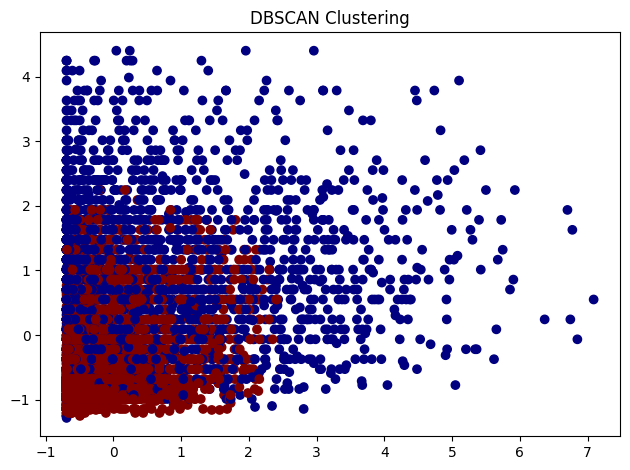

In [176]:
if len(set(df7['DBSCAN_Clusters'])) > 1:
    dbscan_sil_score = silhouette_score(scaled_df, df7['DBSCAN_Clusters'])
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")


plt.subplot(1, 1, 1)
plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=df7['DBSCAN_Clusters'], cmap='jet')
plt.title('DBSCAN Clustering')
plt.tight_layout()
plt.show()